In [1]:
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

Convert Video to Frames

In [2]:
def vid_to_frame(path_video, path_frames):
    vidcap = cv2.VideoCapture(path_video)
    os.chdir(path_frames)

    def getFrames(sec):
        vidcap.set(cv2.CAP_PROP_POS_MSEC, sec * 1000)
        frame, image = vidcap.read()
        if frame:
            cv2.imwrite(str(count) + "_image.jpg", image)
            
        return frame
    
    sec = 0
    framerate = 1
    count = 1
    condition = getFrames(sec)
    while condition:
        count += 1
        sec += framerate
        sec = round(sec,2)
        condition = getFrames(sec)

In [36]:
root_dir = os.path.dirname(os.path.abspath("1. Data Processing - Anwar.ipynb"))
print(root_dir)
head, tail = os.path.split(root_dir)
print(head)
path_video = os.path.join(head, "trimmedVideo.mov")
print(path_video)
path_frames = os.path.join(head,"images")

/Users/bramcals/Documents/Repos/AI-for-Wildlife/ModelBuilder/Data/images
/Users/bramcals/Documents/Repos/AI-for-Wildlife/ModelBuilder/Data
/Users/bramcals/Documents/Repos/AI-for-Wildlife/ModelBuilder/Data/trimmedVideo.mov


In [37]:
frames_have_been_extracted = False

if frames_have_been_extracted == False:
    vid_to_frame(path_video, path_frames)

In [38]:
from PIL import Image, ImageChops


In [45]:
im_before_cropping = Image.open('1_image.jpg')

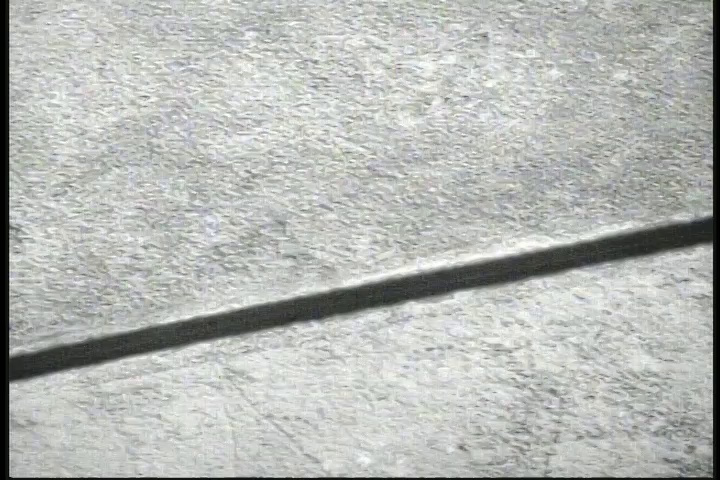

In [46]:
im_before_cropping

## Cropping images

In [47]:
 def trim(im):
        bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
        diff = ImageChops.difference(im, bg)
        diff = ImageChops.add(diff, diff, 2.0, -100)
        bbox = diff.getbbox()
        if bbox:
            return im.crop(bbox)


In [51]:
im_after_cropping = trim(im_before_cropping)
im_after_cropping

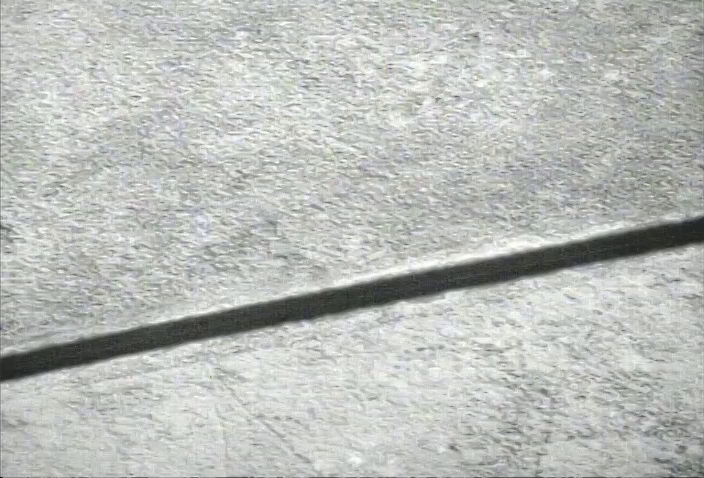